# **Importing Modules**

In [ ]:
%pip install scikeras

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# **Importing Datasets**

In [ ]:
data = pd.read_csv('datasets/train.csv')
stores = pd.read_csv('datasets/stores.csv')
features = pd.read_csv('datasets/features.csv')

**Training Dataset**

In [ ]:
data.shape

(421570, 5)

In [ ]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Dataset containing info of Stores**

In [ ]:
stores.shape

(45, 3)

In [ ]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [ ]:
features.shape

(8190, 12)

In [ ]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [ ]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [ ]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [ ]:
data = pd.merge(data,stores,on='Store',how='left')

In [ ]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.sort_values(by=['Date'],inplace=True)

In [ ]:
data.set_index(data.Date, inplace=True)

In [ ]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [ ]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


# **Splitting Date Column**

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


# **Outlier Detection and Abnormalities**

**Outliers**

In [ ]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [ ]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [ ]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [ ]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [ ]:
data.shape

(421533, 20)

In [ ]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

**Negative Weekly Sales**

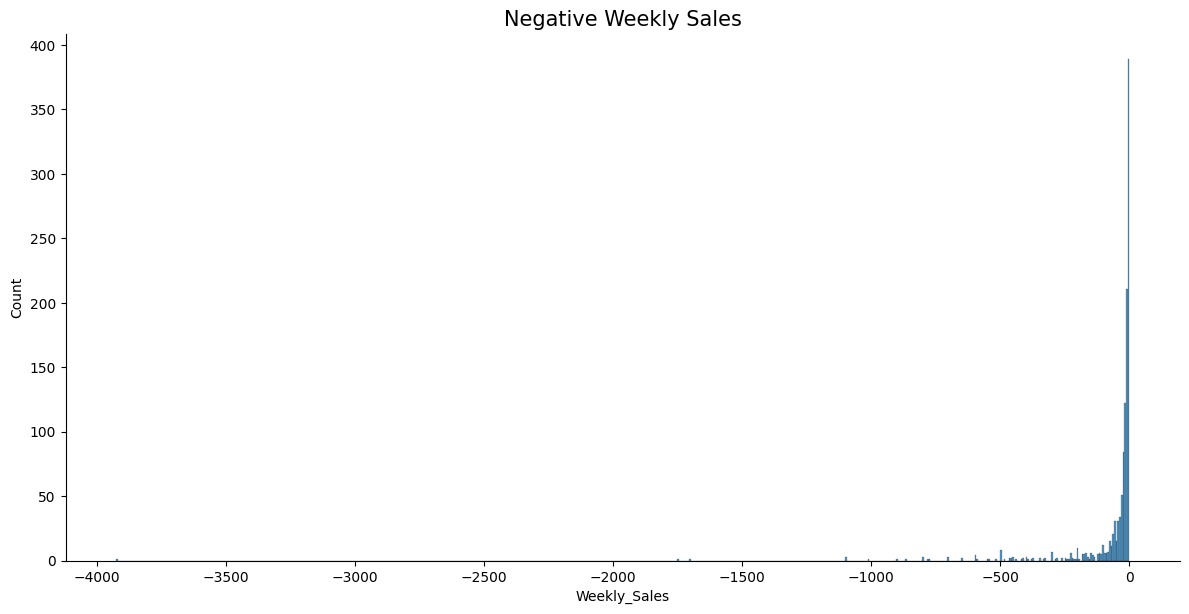

In [ ]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.savefig('plots/negative_weekly_sales.png')
plt.show()

In [ ]:
data=data[data['Weekly_Sales']>=0]

In [ ]:
data.shape

(374247, 20)

In [ ]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [ ]:
data.to_csv('./datasets/preprocessed_walmart_dataset.csv')

# **Data Visuallizations**

**Average Monthly Sales**

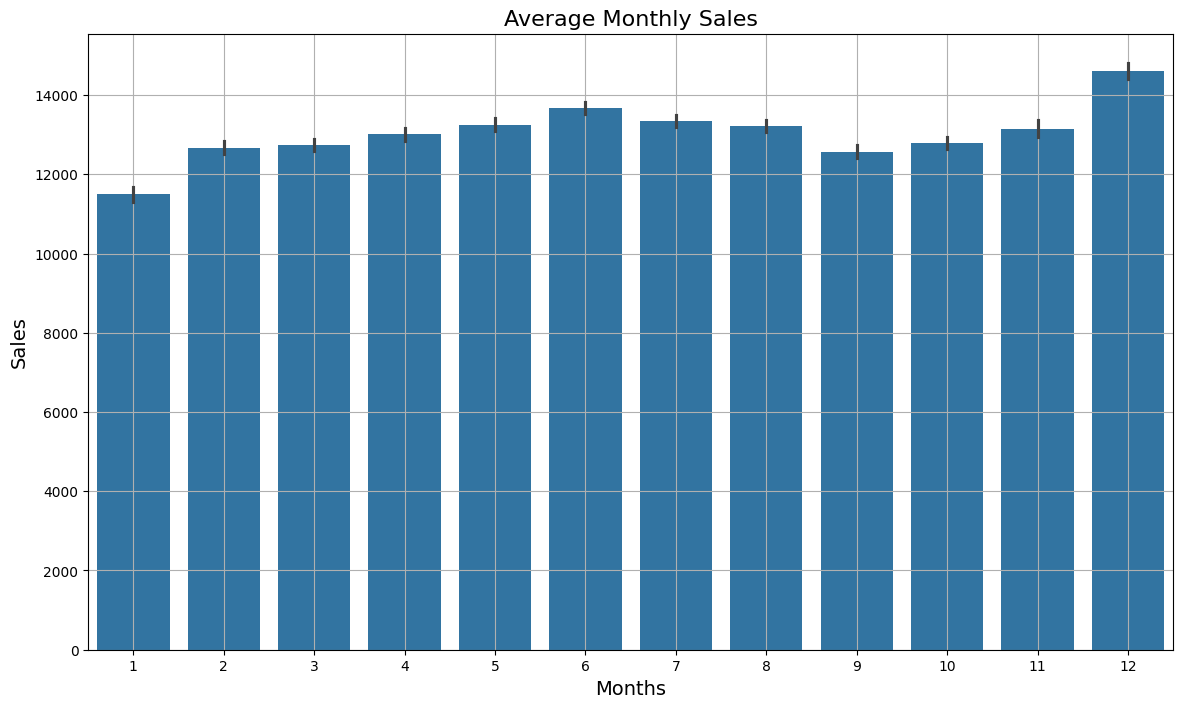

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('plots/avg_monthly_sales.png')
plt.grid()

**Monthly Sales for Each Year**

In [ ]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


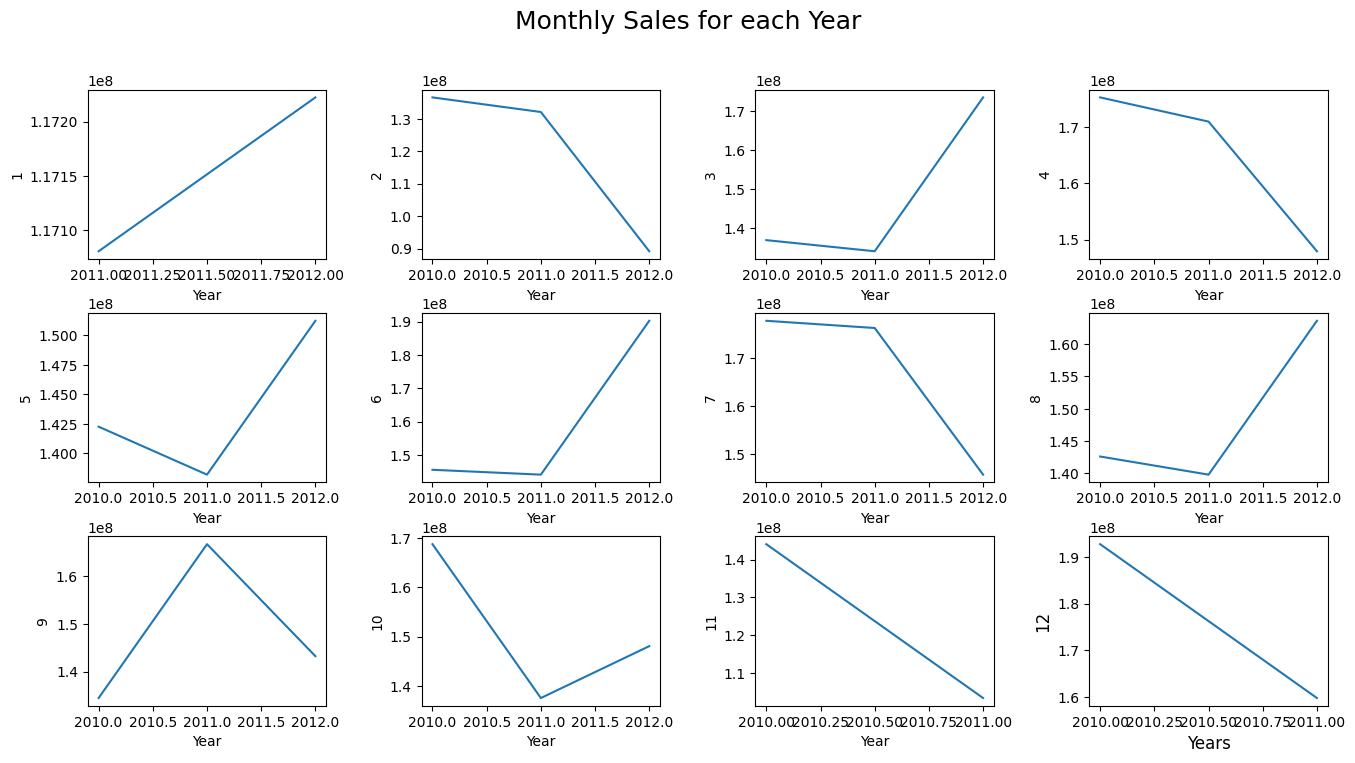

In [ ]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('plots/monthly_sales_every_year.png')
plt.show()

**Average Weekly Sales Store wise**

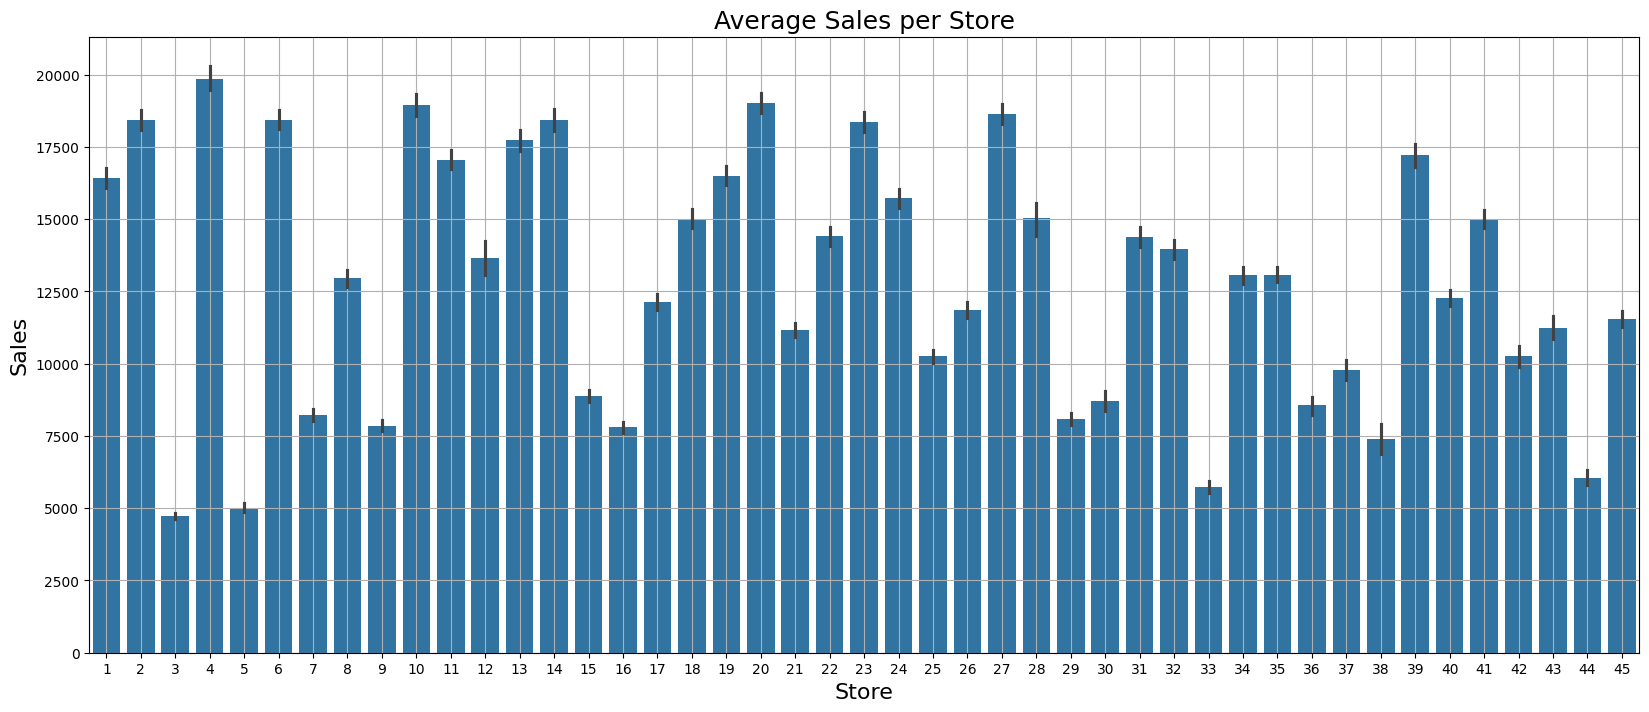

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('plots/avg_sales_store.png')
plt.show()

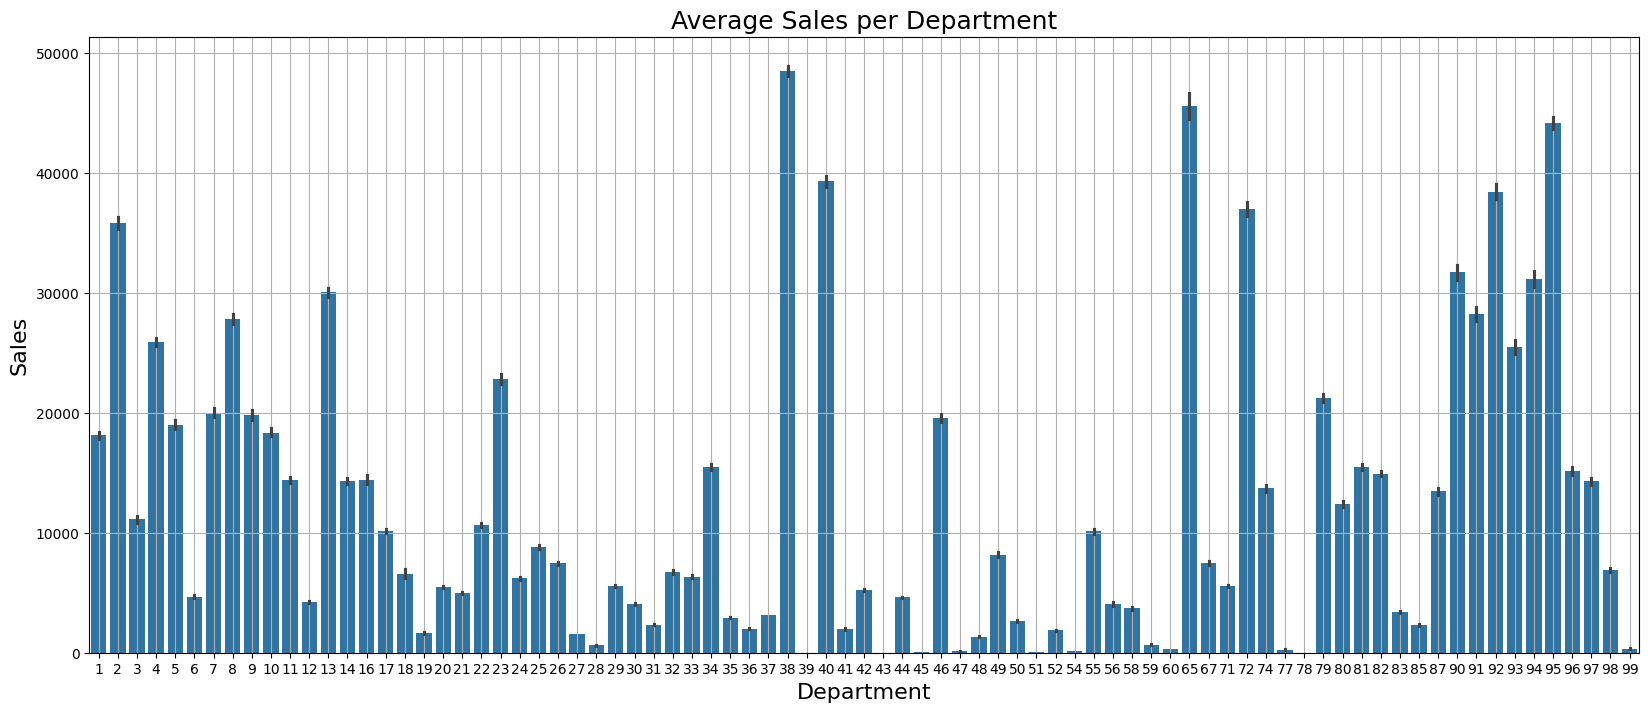

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.savefig('plots/avg_sales_dept.png')
plt.show()

**Sales Vs Temperature**

<ipython-input-46-632529051a9b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


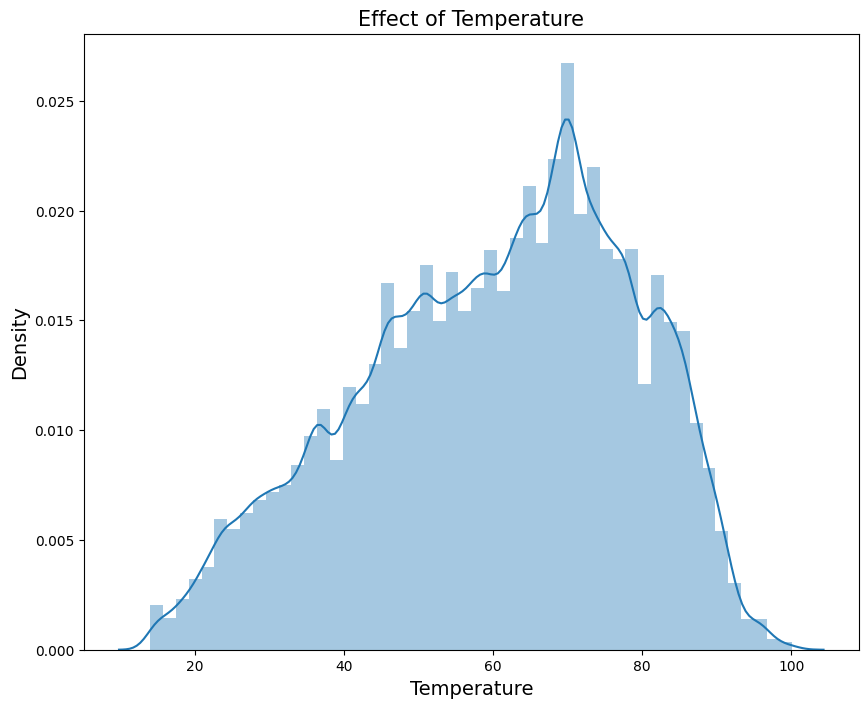

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('plots/effect_of_temp.png')
plt.show()

**Holiday Distribution**

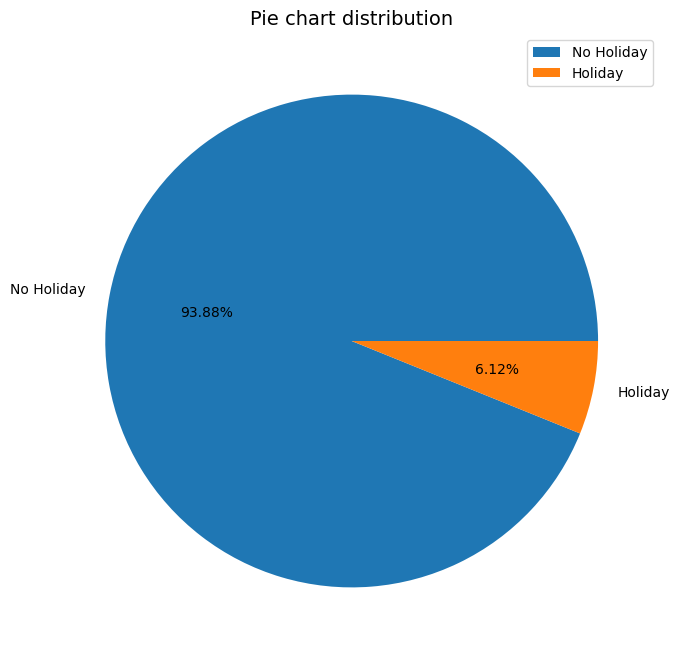

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('plots/holiday_distribution.png')
plt.show()

#**Time Series Decompose**

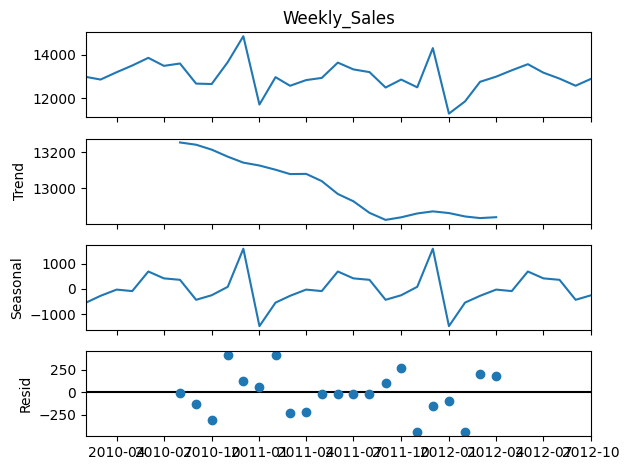

In [ ]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.savefig('plots/seasonal_decompose.png')
plt.show()

# **One-hot-encoding**

In [ ]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [ ]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data.shape

(374247, 20)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(374247, 149)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.drop(columns=['Date'],inplace=True)

In [ ]:
data.shape

(374247, 145)

# **Data Normalization**

In [ ]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


# **Correlation between features of dataset**

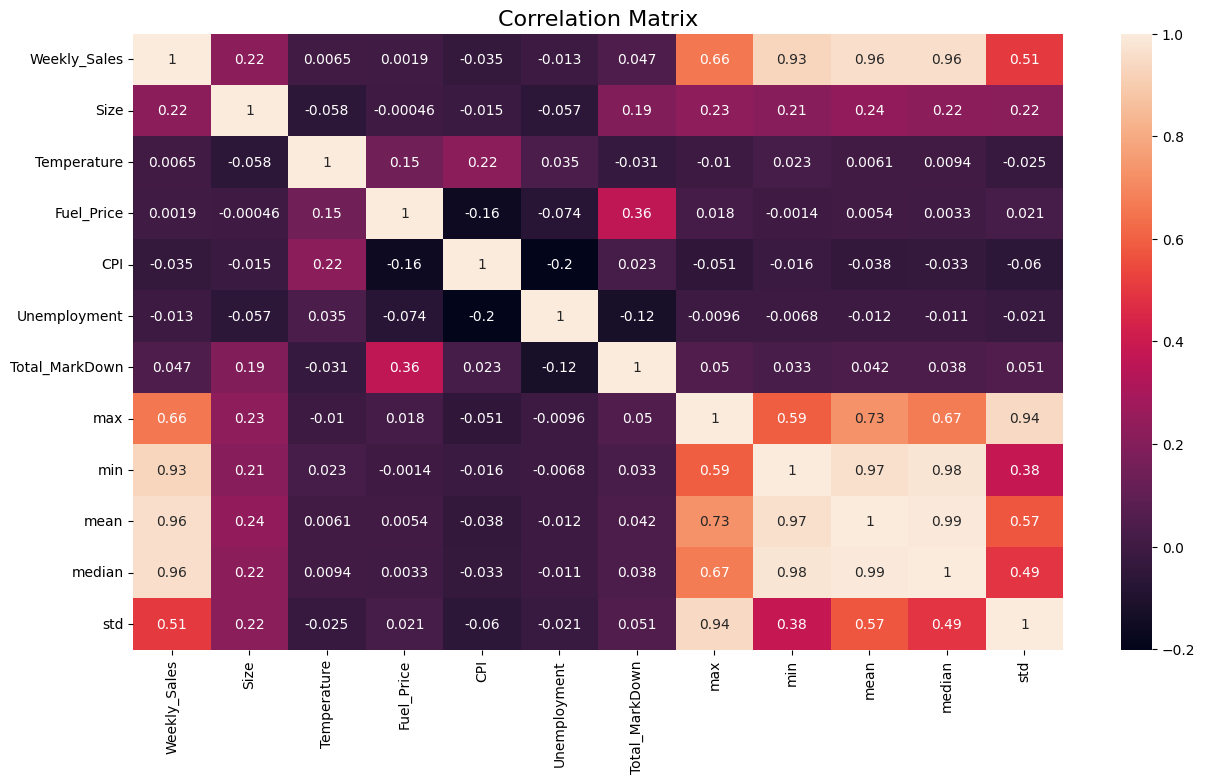

In [ ]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('plots/correlation_matrix.png')
plt.show()

# **Recursive Feature Elimination**

In [ ]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [ ]:
'''
param_grid={'n_estimators':np.arange(10,25)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(data_train[feature_col],data_train['Weekly_Sales'])
'''

"\nparam_grid={'n_estimators':np.arange(10,25)}\ntree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)\ntree.fit(data_train[feature_col],data_train['Weekly_Sales'])\n"

In [ ]:
#tree.best_params_

In [ ]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [ ]:
pkl_filename = "./models/feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,4.901245e-01
1,2,median,4.377203e-01
2,3,Week,1.976801e-02
3,4,Temperature,8.937651e-03
4,5,max,6.005556e-03
...,...,...,...
139,140,Dept_51,2.970103e-10
140,141,Dept_45,2.057672e-10
141,142,Dept_78,4.909996e-12
142,143,Dept_39,7.686435e-14


In [ ]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Dept_11', 'Dept_1', 'Dept_9', 'Year', 'Dept_5', 'Dept_56']


In [ ]:
X = data[x]
Y = data['Weekly_Sales']

In [ ]:
data = pd.concat([X,Y],axis=1)

In [ ]:
data

,mean,median,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Dept_11,Dept_1,Dept_9,Year,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,False,0.630267,False,True,False,2010,False,False,0.342576
2010-02-05,0.004499,0.004767,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.305248,0.004083,...,0,False,0.492338,False,False,False,2010,False,False,0.009188
2010-02-05,0.009135,0.008968,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.305248,0.004314,...,0,False,0.492338,False,False,False,2010,False,False,0.009537
2010-02-05,0.085594,0.086290,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.291286,0.010611,...,0,False,0.650636,False,False,False,2010,False,False,0.118953
2010-02-05,0.080242,0.071542,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.305248,0.054362,...,0,False,0.492338,False,False,False,2010,False,False,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.087055,0.082590,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.275758,0.039642,...,0,False,0.906277,False,False,False,2012,False,False,0.127259
2012-10-26,0.001419,0.001617,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.760713,0.000478,...,0,False,0.026063,False,False,False,2012,False,False,0.000730
2012-10-26,0.072181,0.064375,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.496028,0.072670,...,0,False,0.916437,False,False,False,2012,False,False,0.073391


In [ ]:
data.to_csv('./datasets/final_data.csv')

# **Data Splitted into Training, Validation, Test**

In [ ]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# **Linear Regression Model**

In [105]:
# lr = LinearRegression(normalize=False)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.28079698115758


In [107]:
y_pred = lr.predict(X_test)

In [108]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030057714921514423
MSE 0.0034851431916206577
RMSE 0.059035101351828455
R2 0.9228079866096734


In [109]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('./predictions/lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132555
2010-07-09,0.364278,0.280242
2011-07-01,0.005003,0.026085
2012-01-06,0.015856,0.015369
2011-08-26,0.000318,0.002072
...,...,...
2011-01-28,0.169068,0.236392
2010-08-20,0.252860,0.235591
2010-11-26,0.265617,0.321839


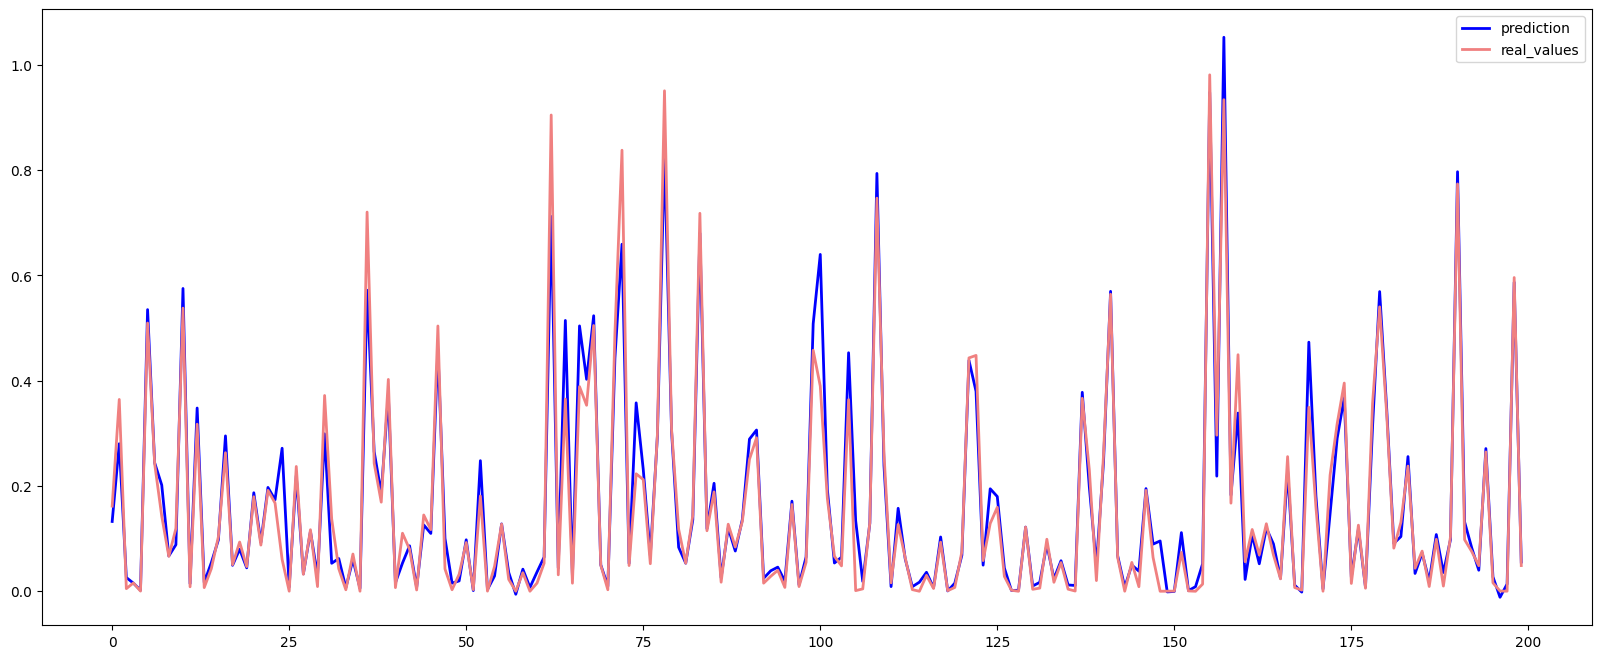

In [110]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/lr_real_pred.png')
plt.show()

**Saving trained model**

In [111]:
pkl_filename = "./models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Random Forest Regressor Model**

In [79]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.89453664523606


In [81]:
y_pred = rf.predict(X_test)

In [82]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015532135022247262
MSE 0.0009505957102243328
RMSE 0.030831732196299526
R2 0.9789458455387352


In [83]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.121663
2010-07-09,0.364278,0.328271
2011-07-01,0.005003,0.012979
2012-01-06,0.015856,0.020534
2011-08-26,0.000318,0.000568
...,...,...
2011-01-28,0.169068,0.176571
2010-08-20,0.252860,0.260975
2010-11-26,0.265617,0.379837


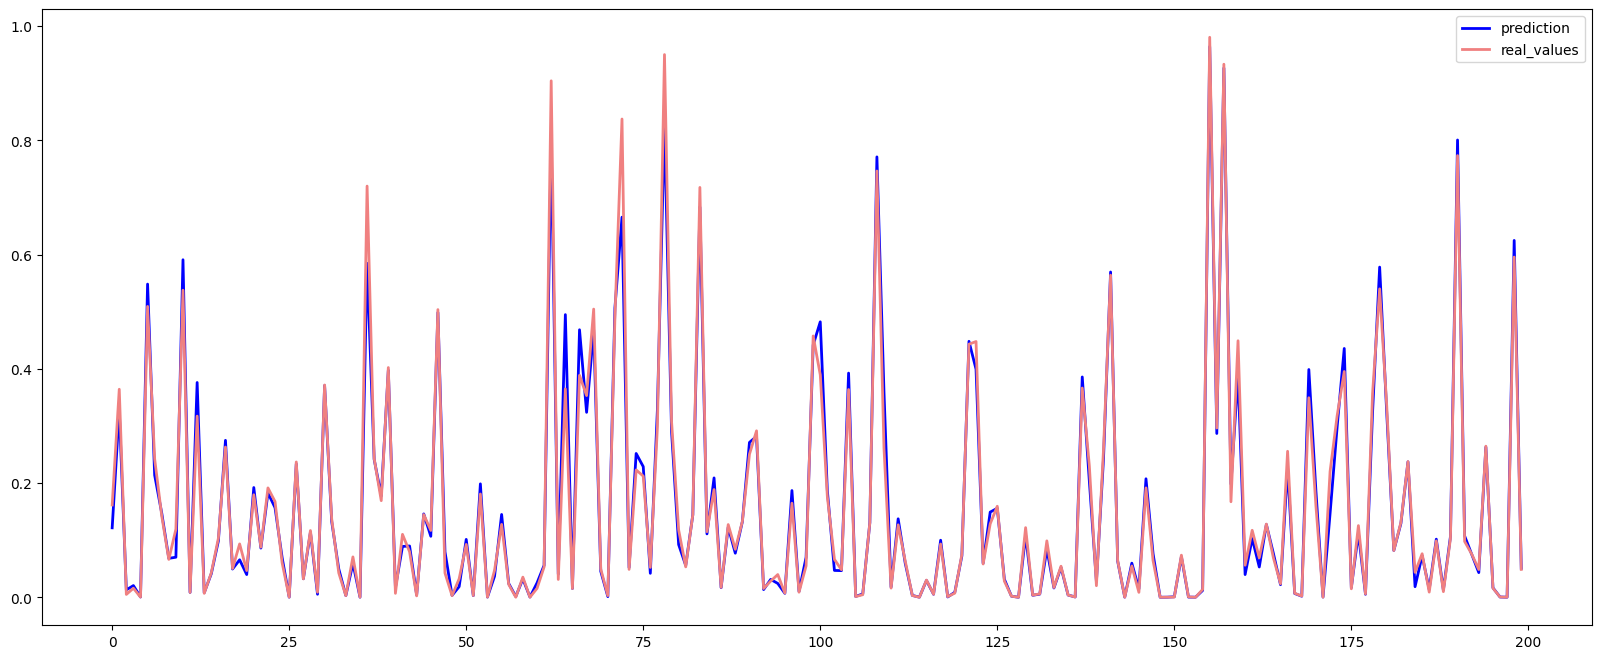

In [84]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/rf_real_pred.png')
plt.show()

**Saving trained model**

In [85]:
pkl_filename = "./models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **K Neighbors Regressor Model**

In [86]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [87]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.97260310713533


In [88]:
y_pred = knn.predict(X_test)

In [89]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03312215784495987
MSE 0.003624289652612284
RMSE 0.060202073490971085
R2 0.9199211027805663


In [90]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('./predictions/knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.112559
2010-07-09,0.364278,0.221307
2011-07-01,0.005003,0.011921
2012-01-06,0.015856,0.028551
2011-08-26,0.000318,0.001063
...,...,...
2011-01-28,0.169068,0.229475
2010-08-20,0.252860,0.262688
2010-11-26,0.265617,0.203904


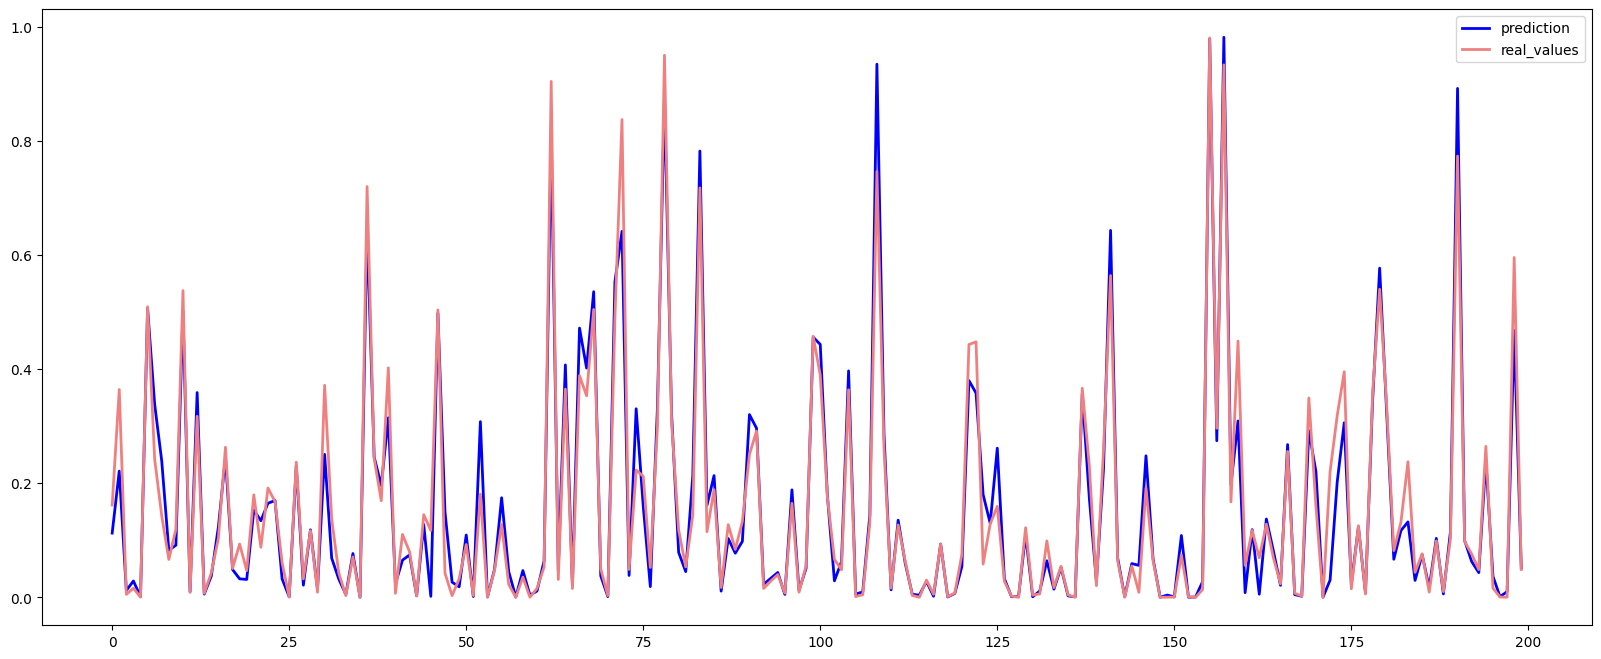

In [91]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/knn_real_pred.png')
plt.show()

**Saving trained model**

In [92]:
pkl_filename = "./models/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **XGboost Model**

In [93]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.30122568962145


In [95]:
y_pred = xgbr.predict(X_test)

In [96]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019802650555444917
MSE 0.0012184696905338107
RMSE 0.034906585202993015
R2 0.973012533919636


In [97]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./predictions/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.128253
2010-07-09,0.364278,0.309000
2011-07-01,0.005003,0.018648
2012-01-06,0.015856,0.020477
2011-08-26,0.000318,0.000478
...,...,...
2011-01-28,0.169068,0.220189
2010-08-20,0.252860,0.244801
2010-11-26,0.265617,0.382784


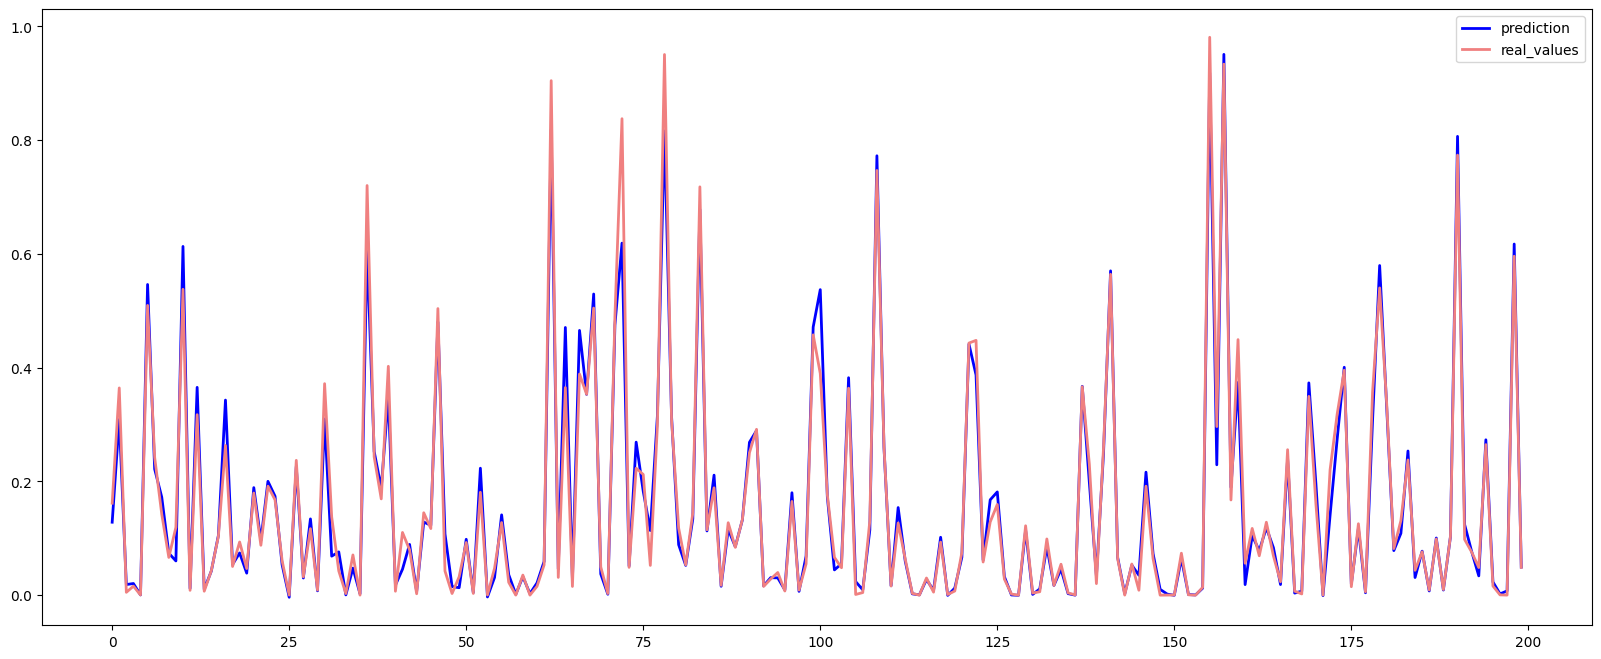

In [98]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/xgb_real_pred.png')
plt.show()

**Saving trained model**

In [99]:
pkl_filename = "./models/xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Custom Deep Learning Neural Network**

In [100]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [101]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1)

In [117]:
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000, verbose=1)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 1.4343 - val_loss: 0.1764
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1804 - val_loss: 0.1961
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1941 - val_loss: 0.2093
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1816 - val_loss: 0.1357
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1774 - val_loss: 0.1312
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1905 - val_loss: 0.2089
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1735 - val_loss: 0.1753
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1926 - val_loss: 0.1195
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1799 - val_loss: 0.4079
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5282 - val_loss: 0.1184
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1695 - val_loss: 0.1197
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.savefig('plots/dnn_loss.png')
plt.show()

In [120]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  91.60893291393613


In [121]:
y_pred = estimator_model.predict(X_test)

2340/2340 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [122]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.05565606899018214
MSE 0.005304892274927454
RMSE 0.07283469142467382
R2 0.9077846173329137


In [123]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.to_csv('./predictions/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.158748
2010-07-09,0.364278,0.312357
2011-07-01,0.005003,0.071179
2012-01-06,0.015856,0.059667
2011-08-26,0.000318,0.054802
...,...,...
2011-01-28,0.169068,0.264938
2010-08-20,0.252860,0.265074
2010-11-26,0.265617,0.362783


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


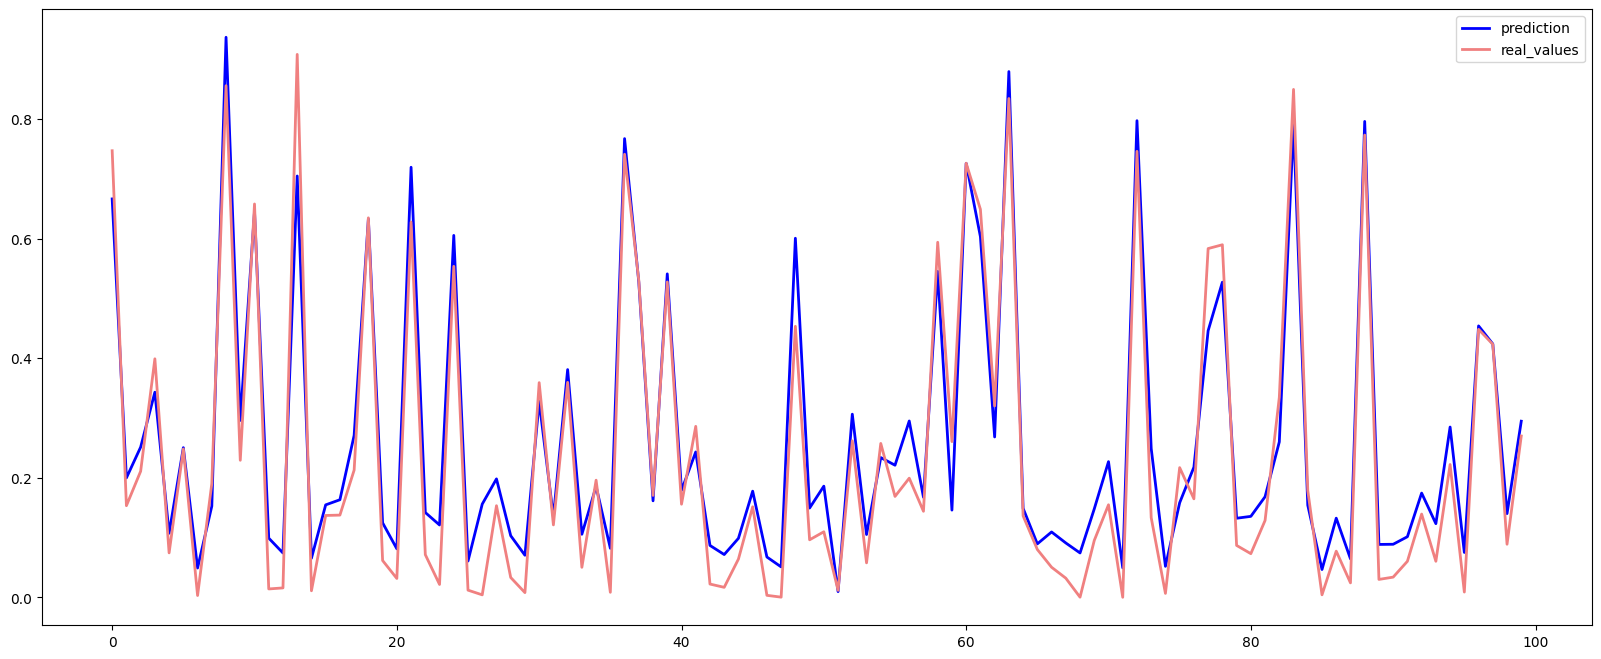

In [124]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.savefig('plots/dnn_real_pred.png')
plt.legend(loc="best")

# **Comparing Models**

In [127]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [128]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.280797
1,rf_acc,97.894537
2,knn_acc,91.972603
3,xgb_acc,97.301226
4,dnn_acc,91.608933


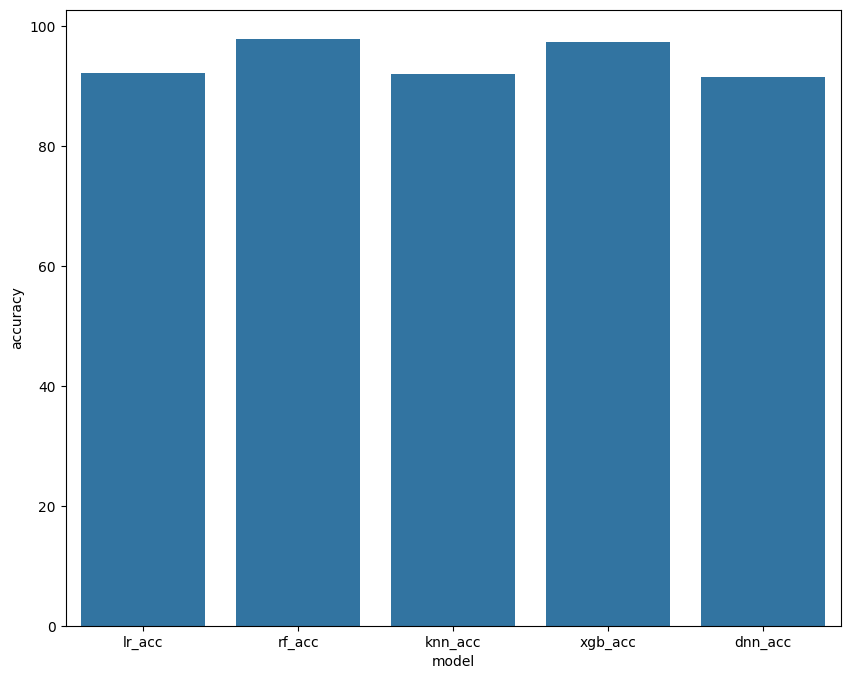

In [129]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.savefig('plots/compared_models.png')
plt.show()